<a href="https://colab.research.google.com/github/valesierrai/Aprendizaje-No-Supervisado-para-el-AD/blob/main/clustering_mas_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso de negocio


Con la creciente competencia en el mercado inmobiliario de Nueva York, es fundamental para las empresas del sector identificar oportunidades de mercado y mejorar sus estrategias comerciales.

En el mercado inmobiliario de Nueva York, la diversidad de propiedades disponibles presenta un desafío para los agentes inmobiliarios al momento de especializarse y maximizar sus ventas. La venta de una casa costosa con pocas habitaciones difiere significativamente de una casa económica con múltiples habitaciones, lo que resalta la importancia de la especialización. A través de la creación de segmentos de casas basados en características clave como precio, tamaño, número de habitaciones y ubicación, se busca asignar a los agentes inmobiliarios a segmentos específicos que se alineen con sus habilidades y conocimientos, optimizando así sus esfuerzos de venta y potenciando su éxito en un mercado tan diverso y competitivo como el de Nueva York.

Para esto se tienen información demográfica, comportamiento de gastos, niveles de satisfacción e información de campañas.

Description of Columns:

* BROKERTITLE: Title of the broker.

* TYPE: Type of the house.

* PRICE: Price of the house.

* BEDS: Number of bedrooms.

* BATH: Number of bathrooms.

* PROPERTYSQFT: Square footage of the property.

* ADDRESS: Full address of the house.

* STATE: State of the house.

* MAIN_ADDRESS: Main address information.

* ADMINISTRATIVE_AREA_LEVEL_2: Administrative area level 2 information.

* LOCALITY: Locality information.

* SUBLOCALITY: Sublocality information.

* STREET_NAME: Street name.

* LONG_NAME: Long name.

* FORMATTED_ADDRESS: Formatted address.

* LATITUDE: Latitude coordinate of the house.

* LONGITUDE: Longitude coordinate of the house.

In [ ]:
from google.colab import drive # conexión con drive
drive.mount('/content/drive')
import pandas as pd # Manejo de Data Frame
import numpy as np # Manejo matricial
import warnings # Omitir warnings
warnings.filterwarnings("ignore") # Ignorar warning (me estresan los warnings >:|)
# librerías para Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Librerías para clustering
from sklearn.cluster import (KMeans, AgglomerativeClustering)
from scipy.cluster.hierarchy import dendrogram,  linkage # Dendograma
# Score de silueta
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler # estandarizar variables.

Mounted at /content/drive


# Metodología

Para este tipo de problema debemos entender el problema y las expectativas del negocio.






## Problema del negocio

Crear segmentos de casa para asignar agentes inmobiliarios.



## Entender los datos

Para resolver este problema debemos analizar los datos y verificar que estos están alineados con el problema del negocio.



In [ ]:
datos = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Aprendizaje No Supervisado/NY-House-Dataset.csv")
datos

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


Tenemos información mucha información que representa la ubicación de la casa, sin embargo, ¿de dicha información cuál es la más relevante?

Muchas de ellos son componentes de la dirección, pero esta es casi única para todas las casas, lo que nos puede servir es la posición geográfica.




In [ ]:
fig = px.scatter_mapbox(datos, lat="LATITUDE", lon="LONGITUDE", #hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["blue"], zoom=9, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Es importante conocer la ubicación de los agentes inmobiliarios, ya que estos deben estar ubicados en puntos estratégicos, por esto dichas variables van a ser utilizadas para segmentación.

¿Qué otras variables podemos analizar?

El precio, habitaciones, baños, cantidad de metros cuadrados y el tipo de vivienda.



In [ ]:
datos.describe() # Resumen variables númericas

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [ ]:
datos= datos[ datos["PRICE"]< 10**9]

In [ ]:
datos["TYPE"].value_counts()

,count
TYPE,
Co-op for sale,1450
House for sale,1011
Condo for sale,891
Multi-family home for sale,727
Townhouse for sale,299
Pending,243
Contingent,88
Land for sale,49
For sale,20


In [ ]:
datos["TYPE"].value_counts().index

Index(['Co-op for sale', 'House for sale', 'Condo for sale',
       'Multi-family home for sale', 'Townhouse for sale', 'Pending',
       'Contingent', 'Land for sale', 'For sale', 'Foreclosure',
       'Condop for sale', 'Coming Soon', 'Mobile house for sale'],
      dtype='object', name='TYPE')

Existen 13 tipos de casa, sin embargo, existen muchos tipos de casa que son poco frecuentes, una alternativa puede ser que las categorías con muy poca frecuencia entren a otra categoría.

In [ ]:
px.box(datos, x="TYPE", y= "PRICE" )

In [ ]:
categorias_otra = ['Pending',
       'Contingent', 'Land for sale', 'For sale', 'Foreclosure',
       'Condop for sale', 'Coming Soon', 'Mobile house for sale']

datos["TYPE_MOD"]=datos["TYPE"].replace(categorias_otra, "Other" )
datos["TYPE_MOD"].value_counts()

,count
TYPE_MOD,
Co-op for sale,1450
House for sale,1011
Condo for sale,891
Multi-family home for sale,727
Other,422
Townhouse for sale,299


In [ ]:
px.box(datos, x="TYPE_MOD", y= "PRICE" )

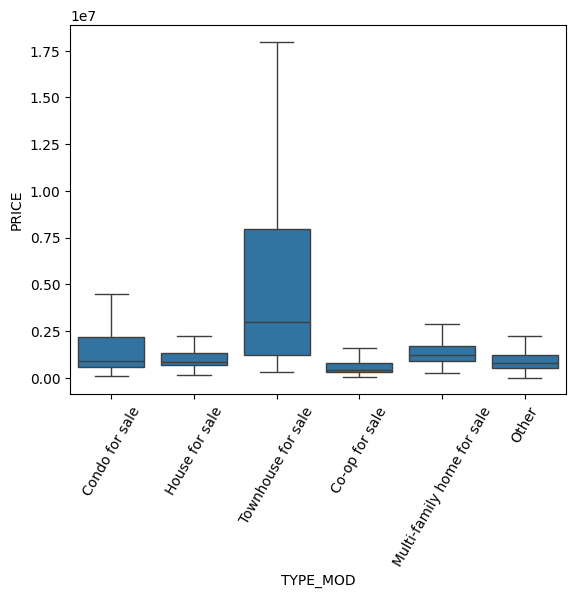

In [ ]:
sns.boxplot(datos, x="TYPE_MOD", y= "PRICE",showfliers=False  )
plt.tick_params(axis='x', rotation=60)

Se puede observa una diferencia en el precio por el tipo de vivienda.




In [ ]:
datos_cluster= datos[['PRICE',	'BEDS',	'BATH',	'PROPERTYSQFT',	'LATITUDE',	'LONGITUDE',
                                "TYPE_MOD"
                                ]]
datos_cluster.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,TYPE_MOD
0,315000,2,2.000000,1400.0,40.761255,-73.974483,Condo for sale
1,195000000,7,10.000000,17545.0,40.766393,-73.980991,Condo for sale
2,260000,4,2.000000,2015.0,40.541805,-74.196109,House for sale
3,69000,3,1.000000,445.0,40.761398,-73.974613,Condo for sale
4,55000000,7,2.373861,14175.0,40.767224,-73.969856,Townhouse for sale


Finalmente, estas son las variables que se van a utilizar para la segmentación de casas.



## Estandarización de variables

Para realizar la implementación de algoritmos utilizamos la estandarización de variables, pero ¿Qué sucede con la variable TYPE_MOD?  

Realizamos una transformación a variable dummies, que es crear una columna por cada categoría

In [ ]:
#Get_dumies me tranforma las variables categóricas y el sistema me las transforma a variables númericas
datos_numericos = pd.get_dummies(datos_cluster, # Datos
                                 ['TYPE_MOD' ], # Columnas categorícas
                                 )

Con get_dummies, se crea una columna por cada categoría de TYPE_MOD, donde 1 es la categoría de la columna y 0, no lo es.

In [ ]:
datos_numericos

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,TYPE_MOD_Co-op for sale,TYPE_MOD_Condo for sale,TYPE_MOD_House for sale,TYPE_MOD_Multi-family home for sale,TYPE_MOD_Other,TYPE_MOD_Townhouse for sale
0,315000,2,2.000000,1400.000000,40.761255,-73.974483,False,True,False,False,False,False
1,195000000,7,10.000000,17545.000000,40.766393,-73.980991,False,True,False,False,False,False
2,260000,4,2.000000,2015.000000,40.541805,-74.196109,False,False,True,False,False,False
3,69000,3,1.000000,445.000000,40.761398,-73.974613,False,True,False,False,False,False
4,55000000,7,2.373861,14175.000000,40.767224,-73.969856,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4796,599000,1,1.000000,2184.207862,40.774350,-73.955879,True,False,False,False,False,False
4797,245000,1,1.000000,2184.207862,40.732538,-73.860152,True,False,False,False,False,False
4798,1275000,1,1.000000,2184.207862,40.745882,-74.003398,True,False,False,False,False,False
4799,598125,2,1.000000,655.000000,40.742770,-73.872752,False,True,False,False,False,False


# Implementación de segmentación

Ahora procedemos a estandarizar las variables y luego implementar diferentes técnicas de clustering.


In [ ]:
scaler = StandardScaler() # Función de estandarización
scaled_features = scaler.fit_transform(datos_numericos) #
pd.DataFrame(scaled_features, columns = datos_numericos.columns)

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,TYPE_MOD_Co-op for sale,TYPE_MOD_Condo for sale,TYPE_MOD_House for sale,TYPE_MOD_Multi-family home for sale,TYPE_MOD_Other,TYPE_MOD_Townhouse for sale
0,-0.323626,-0.521197,-0.191704,-0.329582,0.536199,-0.326150,-0.657903,2.094566,-0.516551,-0.422484,-0.310469,-0.257740
1,39.177021,1.400562,3.918748,6.469853,0.594838,-0.390580,-0.657903,2.094566,-0.516551,-0.422484,-0.310469,-0.257740
2,-0.334785,0.247507,-0.191704,-0.070576,-1.968078,-2.520458,-0.657903,-0.477426,1.935917,-0.422484,-0.310469,-0.257740
3,-0.373538,-0.136845,-0.705511,-0.731778,0.537830,-0.327431,-0.657903,2.094566,-0.516551,-0.422484,-0.310469,-0.257740
4,10.771697,1.400562,0.000388,5.050584,0.604309,-0.280335,-0.657903,-0.477426,-0.516551,-0.422484,-0.310469,3.879886
...,...,...,...,...,...,...,...,...,...,...,...,...
4795,-0.266003,-0.905549,-0.705511,0.000686,0.685634,-0.141948,1.519982,-0.477426,-0.516551,-0.422484,-0.310469,-0.257740
4796,-0.337828,-0.905549,-0.705511,0.000686,0.208491,0.805848,1.519982,-0.477426,-0.516551,-0.422484,-0.310469,-0.257740
4797,-0.128846,-0.905549,-0.705511,0.000686,0.360765,-0.612429,1.519982,-0.477426,-0.516551,-0.422484,-0.310469,-0.257740
4798,-0.266181,-0.521197,-0.705511,-0.643337,0.325261,0.681096,-0.657903,2.094566,-0.516551,-0.422484,-0.310469,-0.257740


## K-means

Para implementar el algoritmo de K-means, debemos encontrar el número de clústeres. Utilizando el método del codo y el score de la silueta para determinar el número de clúster.


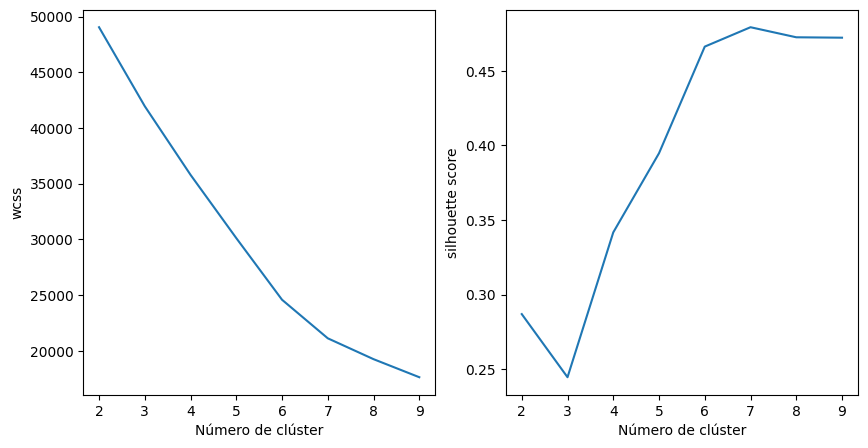

In [ ]:
silueta_score=[]
wcss =[]
n_clusters= range( 2,10)
for k in n_clusters:
  k_means=KMeans(k)
  k_means.fit(scaled_features)
  wcss.append(k_means.inertia_ )
  silueta = silhouette_score(scaled_features, k_means.labels_)
  silueta_score.append(silueta)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(n_clusters,wcss)
axs[0].set_xlabel("Número de clúster" )
axs[0].set_ylabel("wcss" )
axs[1].plot( n_clusters,silueta_score)
axs[1].set_xlabel("Número de clúster" )
axs[1].set_ylabel("silhouette score" )
plt.show()

En este caso observamos con el método de codo para k-means, un número de 6 clúster, como se observa en el silhouette score, un comportamiento diferente, no es un comportamiento similar al SSE, pero a partir del clúster 6 el silhouette score es alto y posteriormente disminuye el score. Para k-means se utilizará 6 clúster.



In [ ]:
k_means=KMeans(6, random_state=123  )
k_means.fit(scaled_features )
datos["labels_k_means"]= k_means.labels_

## Hierarchical clustering

En Hierarchical clustering se busca una jerarquía de los individuos según la distancia entre ellos. utilizamos gráficos como el dendrograma para visualizar la conformación de grupos que se pueden obtener.

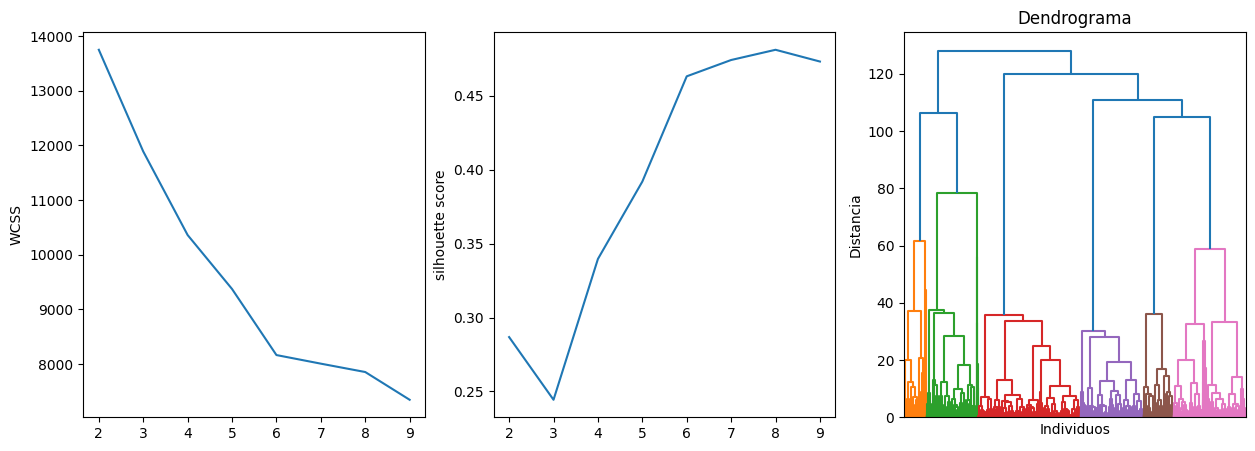

In [ ]:
silueta =[]
wcss =[]
n_cluster=range(2,10)
for i in n_cluster:
  jerarquico = AgglomerativeClustering(i)
  jerarquico.fit(scaled_features)
  scaled_temp= pd.DataFrame(scaled_features)
  scaled_temp["labels"]=jerarquico.labels_
  centros= scaled_temp.groupby("labels").mean()  # obteniendo centros
  argmin, distance =pairwise_distances_argmin_min(scaled_features,centros  )  # obteniendo distancias
  wcss.append(np.sum(distance) )
  score = silhouette_score(scaled_features,jerarquico.labels_ )
  silueta.append(score)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot( (n_cluster), wcss  )
axes[0].set_ylabel("WCSS")
axes[1].plot( (n_cluster), silueta  )
axes[1].set_ylabel("silhouette score")

# visualización clustering jerarquico
dist_matrix = linkage(scaled_features, method='ward')
# Visualizar el dendrograma
dendrogram(dist_matrix,no_labels=True)
axes[2].set_title('Dendrograma')
axes[2].set_xlabel('Individuos')
axes[2].set_ylabel('Distancia')
plt.show()


Para este caso se observa que el número de clústeres ya sea con el score y dendrograma es de 6 clúster.

In [ ]:
hc=AgglomerativeClustering(6 )
hc.fit(scaled_features )
datos["labels_hc"]= hc.labels_

In [ ]:
datos['labels_k_means']=datos['labels_k_means'].astype(str)
datos[ 'labels_hc']=datos[ 'labels_hc'].astype(str)

# Interpretación resultados

Ya implementamos los resultados con 2 modelos diferentes, ahora observaremos que resultados obtenemos por cada modelo.


## K-means

En el algoritmo k-means identificamos 6 clúster. A continuación, vamos a caracterizar los clúster.

,proportion
labels_k_means,
0,30.083333
2,20.895833
4,18.479167
1,15.104167
5,8.770833
3,6.666667


Text(0.5, 1.0, 'Clúster con K-means')

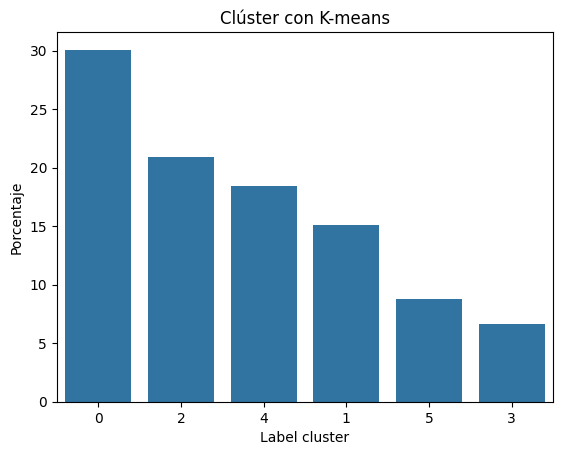

In [ ]:
display(datos['labels_k_means'].value_counts(normalize=True)*100)
sns.barplot( datos['labels_k_means'].value_counts(normalize=True)*100 )
plt.xlabel("Label cluster")
plt.ylabel("Porcentaje")
plt.title("Clúster con K-means")

In [ ]:
# incluir outlirs
name_cluster= 'labels_k_means'
titulo = 'Clúster con k-means 6 clúster'
fig = px.box(datos, color=name_cluster, y='PRICE',
             title=titulo)
fig.update_xaxes(title_text="Label cluster")
fig.update_yaxes(title_text="PRICE")

fig2 = px.box(datos, color=name_cluster, y='BEDS',
              title=titulo)
fig2.update_xaxes(title_text="Label cluster")
fig2.update_yaxes(title_text="BEDS")

fig3= px.box(datos, color=name_cluster, y='BATH', title=titulo,
             )
fig3.update_xaxes(title_text="Label cluster")
fig3.update_yaxes(title_text="BATH")

fig4= px.box(datos, color=name_cluster, y='PROPERTYSQFT', title=titulo,
             )
fig4.update_xaxes(title_text="Label cluster")
fig4.update_yaxes(title_text="PROPERTYSQFT")
# Muestra los gráficos
fig.show()
fig2.show()
fig3.show()
fig4.show()


¿Qué observamos?

El clúster 3 destaca por ser el grupo con mayor precio, baños y cantidad de  metros cuadrados en promedio que los demás clúster, donde se debe destacar que existe una pequeña cantidad de casas.

El clúster 1 ocupa un segundo lugar en cuanto a mayor precio, baños y cantidad de metros cuadrados promedio. Pero es el grupo que tiene mayor número de habitaciones promedio.

El clúster 4 ocupa el tercer lugar en cuanto al precio promedio de casas, pero es el clúster con menor cantidad de metros cuadrados promedio.

El clúster 2 presenta un precio promedio similar al clúster 4, sin embargo este es menos variable.

El clúster 5 ocupa un 5 lugar en la categoría de precios ocupa el penultimo lugar.

El clúster 0 es el clúster con menor valor en las variables en general, pero representa un 30% de las casas en venta.

En general parece existir un orden de 3, 1, 4, 2, 5 y 0. Desde casas mas valoradas a menos valoradas (no solo de precio).



In [ ]:
px.scatter( datos,x='PROPERTYSQFT', y='PRICE', color= 'labels_k_means'  )

In [ ]:
px.scatter( datos,x='LATITUDE', y='LONGITUDE', color= 'labels_k_means'  )

En cuanto a la ubicación geo espacial, no se observa una agrupación especifica, se observa una disperción alta por todos los puntos en cada clúster.

In [ ]:
tabla1 = datos.groupby('labels_k_means')["TYPE_MOD"].value_counts(normalize=True)
px.bar(tabla1.reset_index(), x='labels_k_means',y="proportion" , color='TYPE_MOD', barmode='group')

Por otro lado, se observa que las etiquetas tienen asignado un tipo de casa especifico, existen 6 tipos de casa pero estos corresponden al clúster

¿Qué pasa con clúster jerárquico?
